## **Imorts**

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

# **Code blocks**

### First apply the bird eye view on an image 

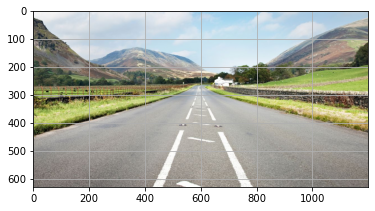

In [2]:
img=cv2.imread('highway.jpg')# image read
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)# convert from BGR to RGB because OpenCV read the image in BGR and matplotlib shows image in RGB
plt.grid()# putting a grid on the image to facilitate the selection of points
plt.imshow(img)# image show

In [3]:
img.shape # to know the size of the pic

(630, 1200, 3)

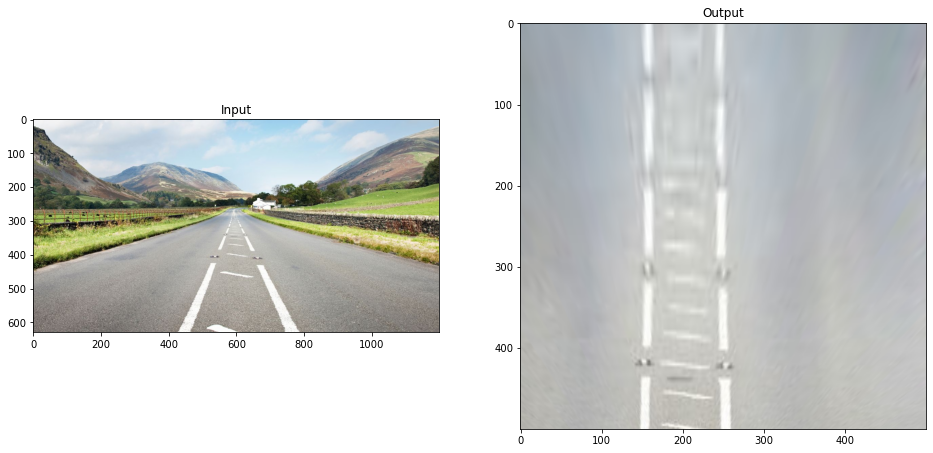

In [4]:
pts1 = np.float32([[0,630],[550,300],[1200,630],[640,300]])# the coordinates on the original image
pts2 = np.float32([[0,630],[0,0],[400,630],[400,0]])# the coordinates of the birds-eye view
M = cv2.getPerspectiveTransform(pts1,pts2)# calculating the transformation matrix
dst = cv2.warpPerspective(img,M,(500,500))#applying the perspective transformation to an image
plt.figure(figsize=(16, 12)) # Create a new figure to put images on it
plt.subplot(121),plt.imshow(img),plt.title('Input') # the original image show
plt.subplot(122),plt.imshow(dst),plt.title('Output')# the birds-eye view image show
plt.show() # Display all open figures.

### second apply the bird eye view on video

In [7]:
cap = cap =cv2.VideoCapture('road.mp4') # you can put 0 or 1 to open your camera instead of the video path # 0 for your main camera # 1 for the second camera [ usb] 
while 1:
    ret,frame = cap.read()  # reading each frame ( "ret" is a boolean if reading is done correctly or not, the "frame" is the image)
    pts1 = np.float32([[500,550],[700,550],[0,700],[1000,700]])# the coordinates on the original frame in the video
    pts2 = np.float32([[0,0],[400,0],[0,500],[400,500]])# the coordinates of the birds-eye view video
    M = cv2.getPerspectiveTransform(pts1,pts2) # calculating the transformation matrix
    dst = cv2.warpPerspective(frame,M,(500,500)) #applying the perspective transformation to the frame
    cv2.imshow('Live',frame) # show the original video
    cv2.imshow("bird view",dst) # show the bird's-eye view video
    if cv2.waitKey(10) & 0xFF == ord('q'):# 0xFF is a hexadecimal constant which is 11111111 in binary.
        break                             # By using bitwise AND (&) with this constant,
                                          # it leaves only the last 8 bits of the original                                               

cap.release()  # to release hardware resources. (the camera here)                       
cv2.destroyAllWindows() # closing all windows